# Wrangle and Analyze Data: WeRateDogs

This project is about data wrangling and visual analysis of data from "the tweet archive of Twitter user @dog_rates, also known as WeRateDogs". "WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog."

This jupyter notebook demonstrates the process to gather, assess and clean data. In the end, a few visualization will be plotted to showcase some of the findings from the tweet data. A summary report will come along in the format of .pdf.

<ul>
<li><a href="#gather">Gather</a></li>
<li><a href="#assess">Assess</a></li>
<li><a href="#clean">Clean</a></li>
<li><a href="#analyze">Store, Analyze and Visualize</a></li>
</ul>

<a id='gather'></a>
# Gather

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# extract data from the twitter archive .csv file and save to pandas dataframe
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [3]:
# connect to the url
folder_name = 'image'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [4]:
# download the tsv file from the url
with open(os.path.join(folder_name,
                       url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)

In [5]:
# save the image prediction data to pandas dataframe
image_prediction = pd.read_csv('image/image-predictions.tsv',sep='\t')
image_prediction.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [6]:
# set up connection with Twitter via API
consumer_key = 'consumer_key'
consumer_secret = 'consumer_secret'
access_token = 'access_token'
access_secret = 'access_secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [7]:
# to test if the connection is successful
tweet = api.get_status('892420643555336193',tweet_mode='extended')
print(tweet._json)

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

From the above __json_ output, I can see a few possible useful fields such as favorite_count, retweet_count, and the person's followers_count. For now I will only extract favorite_count and retweet_count.

In [8]:
# querying data for each tweet ID from twitter_archive
tweets = []
exception_list = []

for tid in twitter_archive['tweet_id']:
    try:
        tweet_info = api.get_status(tid,tweet_mode='extended')._json
        favorite = tweet_info['favorite_count'] # how many favorite counts of this tweet id
        retweet = tweet_info['retweet_count'] # how many retweets of this tweet id
        tweet = {'tweet_id':int(tid),
                 'favorite_count':int(favorite),
                 'retweet_count':int(retweet)}
        tweets.append(tweet)
    except Exception as e:
        exception_list.append(tid)
        print(tid,': ',str(e))
        
print('Valid number of records: ',len(tweets))

888202515573088257 :  [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 :  [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 :  [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 :  [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 :  [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 :  [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 :  [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 :  [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 :  [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 :  [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 :  [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 :  [{'code': 144, 'message': 'No status found with that ID.'}]
8373662848745717

In [9]:
# write JSON data to the file named 'tweet_json.txt'
with open('tweet_json.txt','w') as outfile:
    json.dump(tweets,outfile)

In [10]:
# read data from json file and save to pandas dataframe
tweets_info = pd.DataFrame(columns=['tweet_id','favorite_count','retweet_count'])    

with open('tweet_json.txt') as json_file:
    tweets = json.load(json_file)
    for tweet in tweets:
        tweet_info = {'tweet_id':tweet['tweet_id'],
                      'favorite_count':tweet['favorite_count'],
                      'retweet_count':tweet['retweet_count']}
        tweets_info = tweets_info.append(tweet_info,ignore_index=True)
tweets_info.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,35376,7469
1,892177421306343426,30616,5545
2,891815181378084864,23031,3671
3,891689557279858688,38662,7645
4,891327558926688256,36945,8243


<a id='assess'></a>
# Assess

In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
twitter_archive.tweet_id.duplicated().sum()

0

In [14]:
twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [15]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
image_prediction.tweet_id.duplicated().sum()

0

In [17]:
image_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1463,778396591732486144,https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg,1,hippopotamus,0.581403,False,doormat,0.152445,False,sea_lion,0.026364,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
1879,846514051647705089,https://pbs.twimg.com/media/C79sB4xXwAEvwKY.jpg,2,golden_retriever,0.650003,True,Leonberg,0.065199,True,Norfolk_terrier,0.052955,True
986,707693576495472641,https://pbs.twimg.com/media/CdI7jDnW0AA2dtO.jpg,1,bathtub,0.499525,False,tub,0.488014,False,washbasin,0.009298,False
622,680497766108381184,https://pbs.twimg.com/media/CXGdG0aWcAEbOO1.jpg,1,Chihuahua,0.538354,True,muzzle,0.084289,False,ski_mask,0.076690,False


In [18]:
image_prediction.jpg_url.duplicated().sum()

66

In [19]:
image_prediction[image_prediction.jpg_url =='https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1715,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True


In [20]:
tweets_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null object
favorite_count    2331 non-null object
retweet_count     2331 non-null object
dtypes: object(3)
memory usage: 54.7+ KB


In [21]:
tweets_info.tweet_id.duplicated().sum()

0

In [22]:
tweets_info.sample(5)

,tweet_id,favorite_count,retweet_count
102,871879754684805121,34712,9795
1304,705970349788291072,3093,866
393,823333489516937216,694,22
566,800141422401830912,15237,2537
98,872820683541237760,13625,3331


### Quality Issue
#### twitter_archive
* Column tweet_id should be converted to str type.
* Columns timestamp need to be converted to timestamp type
* Un-useful columns need to be removed, such as in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp    
* Columns rating_numerator and rating_denominator should be converted to float datatype, and they have invalid values
* Invalid None value in column name, should be NaN

#### image_prediction
* Column tweet_id should be converted to str type.
* Un-useful columns need to be removed
* Duplicated jpg_url values, which possibly indicate retweet vs original tweet

#### tweets_info
* Column tweet_id should be converted to str type.
* Columns favorite_count and retweet_count should be converted to int type

### Tidiness Issue
* Data from separate tables need to be merged
* Need to melt columns doggo, floofer, pupper and puppo, and create a single column 'stage' to consolidate the information

<a id='clean'></a>
# Clean

In [23]:
# create a copy of these three dataframes
twitter_archive_cln = twitter_archive.copy()
image_prediction_cln = image_prediction.copy()
tweets_info_cln = tweets_info.copy()

#### _Define_:
Convert datatype for Id columns, timestamp column as well as numeric count columns.

#### _Code_:

In [24]:
# convert id columns to string type
twitter_archive_cln['tweet_id'] = twitter_archive_cln['tweet_id'].astype(str)
image_prediction_cln['tweet_id'] = image_prediction_cln['tweet_id'].astype(str)
tweets_info_cln['tweet_id'] = tweets_info_cln['tweet_id'].astype(str)

# convert timestamp column to timestamp datatype
twitter_archive_cln['timestamp'] = pd.to_datetime(twitter_archive_cln['timestamp'])

# convert counts columns to numeric datatype
tweets_info_cln['favorite_count'] = tweets_info_cln['favorite_count'].astype(int)
tweets_info_cln['retweet_count'] = tweets_info_cln['retweet_count'].astype(int)

#### _Test_:

In [25]:
# to confirm if datatype conversion is successful
twitter_archive_cln.tweet_id.dtype,image_prediction_cln.tweet_id.dtype,tweets_info_cln.tweet_id.dtype,twitter_archive_cln.timestamp.dtype,tweets_info_cln.favorite_count.dtype,tweets_info_cln.retweet_count.dtype

(dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('<M8[ns]'),
 dtype('int64'),
 dtype('int64'))

In [26]:
# to further test if the object type of columns contain actual string type of value
type(twitter_archive_cln.tweet_id.loc[0]),type(image_prediction_cln.tweet_id.loc[0]),type(tweets_info_cln.tweet_id.loc[0]),type(twitter_archive_cln.timestamp.loc[0])

(str, str, str, pandas._libs.tslibs.timestamps.Timestamp)

#### _Define_:
Merge separate dataframes and create a consolidated dataframe *tweet_merge_cln*

#### _Code_:

In [27]:
# merge the separate tables based on their common data field tweet_id
tweet_merge_cln = pd.merge(left=twitter_archive_cln,right=image_prediction_cln,
                           left_on='tweet_id',right_on='tweet_id',how='inner')
tweet_merge_cln = pd.merge(left=tweet_merge_cln,right=tweets_info_cln,
                           left_on='tweet_id',right_on='tweet_id',how='inner')

#### _Test_:

In [28]:
tweet_merge_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 30 columns):
tweet_id                      2059 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2059 non-null datetime64[ns]
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
doggo                         2059 non-null object
floofer                       2059 non-null object
pupper                        2059 non-null object
puppo                         2059 non-null object
jpg_url                   

#### _Define_:
Remove un-useful columns, such as in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp from the original twitter_archive_cln dataframe, as well as jpg_url	and img_num from the original image_prediction_cln dataframe.

#### _Code_:

In [29]:
tweet_merge_cln = tweet_merge_cln.drop(['source','expanded_urls','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)
tweet_merge_cln = tweet_merge_cln.drop(['img_num'],axis=1)

#### _Test_:

In [30]:
tweet_merge_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 23 columns):
tweet_id               2059 non-null object
timestamp              2059 non-null datetime64[ns]
text                   2059 non-null object
retweeted_status_id    72 non-null float64
rating_numerator       2059 non-null int64
rating_denominator     2059 non-null int64
name                   2059 non-null object
doggo                  2059 non-null object
floofer                2059 non-null object
pupper                 2059 non-null object
puppo                  2059 non-null object
jpg_url                2059 non-null object
p1                     2059 non-null object
p1_conf                2059 non-null float64
p1_dog                 2059 non-null bool
p2                     2059 non-null object
p2_conf                2059 non-null float64
p2_dog                 2059 non-null bool
p3                     2059 non-null object
p3_conf                2059 non-null float64
p3_dog   

#### _Define_:
Column rating_denominator should be converted to float datatype, and it has invalid values.

According to the project description, these dog ratings almost always have a denominator of 10. Based on the description of the ratings data, I noticed that the min and max of rating denominator is 2 and 170 respectively, which does not align with the assumption. I will remove rows with a rating_denominator different than 10.


#### _Code_:

In [31]:
tweet_merge_cln['rating_denominator'] = tweet_merge_cln['rating_denominator'].astype(float)

In [32]:
tweet_merge_cln.rating_denominator.value_counts()

10.0     2041
50.0        3
80.0        2
11.0        2
150.0       1
110.0       1
90.0        1
130.0       1
70.0        1
170.0       1
2.0         1
120.0       1
40.0        1
20.0        1
7.0         1
Name: rating_denominator, dtype: int64

In [33]:
# Out of 2059 records, more than 90% of rows (2041) are with a valid rating_denominator, so it's safe to delete the invalid rows
tweet_merge_cln = tweet_merge_cln[tweet_merge_cln['rating_denominator']==10]

#### _Test_:

In [34]:
print('Datatype of column rating_denominator is: \n',tweet_merge_cln.rating_denominator.dtype)
print('Values in this column are: \n',tweet_merge_cln.rating_denominator.value_counts())

Datatype of column rating_denominator is: 
 float64
Values in this column are: 
 10.0    2041
Name: rating_denominator, dtype: int64


#### _Define_:
Column rating_numerator should be converted to float datatype, and it has extreme values.

According to the project description, the rating numerator can be greater than 10, though I noticed some extreme values like 1776, I will take a closer look to decide if these extreme values need to be removed.

#### _Code_:

In [35]:
tweet_merge_cln['rating_numerator'] = tweet_merge_cln['rating_numerator'].astype(float)

In [36]:
tweet_merge_cln.rating_numerator.value_counts()

12.0      471
10.0      427
11.0      413
13.0      275
9.0       150
8.0        95
7.0        51
14.0       38
5.0        34
6.0        32
3.0        19
4.0        15
2.0         9
1.0         4
0.0         2
27.0        1
15.0        1
1776.0      1
26.0        1
75.0        1
420.0       1
Name: rating_numerator, dtype: int64

In [37]:
# print the twitter text for tweets with rating numerator higher than 20
with pd.option_context('max_colwidth', 200):
    display(tweet_merge_cln[tweet_merge_cln['rating_numerator'] > 20][['tweet_id','text']])

,tweet_id,text
548,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"
603,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
789,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
1438,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD
1781,670842764863651840,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY


In [38]:
# Based on the text of row 548, the rating numerator should be 9.75, not 75.0. To make things simple, I will round these decimal ratings to the nearest integer
tweet_merge_cln.loc[(tweet_merge_cln.index==548),'rating_numerator'] = 10.0
# Based on the text of row 603, the rating numerator should be 11.27, not 27.0
tweet_merge_cln.loc[(tweet_merge_cln.index==603),'rating_numerator'] = 11.0
# Based on the text of row 1438, the rating numerator should be 11.26, not 26.0
tweet_merge_cln.loc[(tweet_merge_cln.index==1438),'rating_numerator'] = 11.0

In [39]:
# For row 789 and 1781, the former has something to do with July 4th and the latter is a person instead of a real dog, I will treat them as outliers and remove them from the dataset
tweet_merge_cln = tweet_merge_cln.drop([789,1781])
#tweet_merge_cln = tweet_merge_cln.drop('text',axis=1)

#### _Test_:

In [40]:
print('Datatype of column rating_numerator is: \n',tweet_merge_cln.rating_numerator.dtype)
print('Values in this column are: \n',tweet_merge_cln.rating_numerator.value_counts().sort_index())

Datatype of column rating_numerator is: 
 float64
Values in this column are: 
 0.0       2
1.0       4
2.0       9
3.0      19
4.0      15
5.0      34
6.0      32
7.0      51
8.0      95
9.0     150
10.0    428
11.0    415
12.0    471
13.0    275
14.0     38
15.0      1
Name: rating_numerator, dtype: int64


#### _Define_:
Melt columns doggo, floofer, pupper and puppo, and create a single column 'stage' to consolidate the information

#### _Code_:

In [41]:
all_cols = tweet_merge_cln.columns.tolist()
value_var = ['doggo','floofer','pupper','puppo']
id_var = [x for x in all_cols if x not in value_var]

tweet_merge_cln = pd.melt(tweet_merge_cln,id_vars=id_var,value_vars=value_var,value_name='dog_stage')

In [42]:
tweet_merge_cln = tweet_merge_cln.drop('variable',axis=1)

#### _Test_:

In [43]:
tweet_merge_cln.dog_stage.value_counts()

None       7825
pupper      221
doggo        78
puppo        24
floofer       8
Name: dog_stage, dtype: int64

In [44]:
tweet_merge_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8156 entries, 0 to 8155
Data columns (total 20 columns):
tweet_id               8156 non-null object
timestamp              8156 non-null datetime64[ns]
text                   8156 non-null object
retweeted_status_id    288 non-null float64
rating_numerator       8156 non-null float64
rating_denominator     8156 non-null float64
name                   8156 non-null object
jpg_url                8156 non-null object
p1                     8156 non-null object
p1_conf                8156 non-null float64
p1_dog                 8156 non-null bool
p2                     8156 non-null object
p2_conf                8156 non-null float64
p2_dog                 8156 non-null bool
p3                     8156 non-null object
p3_conf                8156 non-null float64
p3_dog                 8156 non-null bool
favorite_count         8156 non-null int64
retweet_count          8156 non-null int64
dog_stage              8156 non-null object
dtypes: 

#### _Define_:
Remove duplicated rows, including rows with duplicated jpg_url values

#### _Code_:

In [45]:
tweet_merge_cln = tweet_merge_cln[tweet_merge_cln.retweeted_status_id.isnull()]

In [46]:
tweet_merge_cln = tweet_merge_cln.drop_duplicates()

In [47]:
tweet_merge_cln.dog_stage.replace('None',np.NaN,inplace=True)
tweet_merge_cln.sort_values(by='dog_stage',inplace=True)

tweet_merge_cln = tweet_merge_cln.drop_duplicates(subset=['jpg_url'])

#### _Test_:

In [48]:
tweet_merge_cln.jpg_url.duplicated().sum(),tweet_merge_cln.tweet_id.duplicated().sum(),tweet_merge_cln.retweeted_status_id.notnull().sum()

(0, 0, 0)

In [49]:
tweet_merge_cln.dog_stage.value_counts()

pupper     203
doggo       73
puppo       22
floofer      7
Name: dog_stage, dtype: int64

In [50]:
tweet_merge_cln = tweet_merge_cln.drop(['retweeted_status_id','jpg_url'],axis=1)

In [51]:
tweet_merge_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 9 to 2038
Data columns (total 18 columns):
tweet_id              1967 non-null object
timestamp             1967 non-null datetime64[ns]
text                  1967 non-null object
rating_numerator      1967 non-null float64
rating_denominator    1967 non-null float64
name                  1967 non-null object
p1                    1967 non-null object
p1_conf               1967 non-null float64
p1_dog                1967 non-null bool
p2                    1967 non-null object
p2_conf               1967 non-null float64
p2_dog                1967 non-null bool
p3                    1967 non-null object
p3_conf               1967 non-null float64
p3_dog                1967 non-null bool
favorite_count        1967 non-null int64
retweet_count         1967 non-null int64
dog_stage             305 non-null object
dtypes: bool(3), datetime64[ns](1), float64(5), int64(2), object(7)
memory usage: 251.6+ KB


#### _Define_:
Consolidate image prediction columns and create a new column *dog_breed*

#### _Code_:

In [52]:
def get_dog_breed(df):
    if df['p1_dog'] == True:
        dog_breed = df['p1']
    elif df['p2_dog'] == True:
        dog_breed = df['p2']
    elif df['p3_dog'] == True:
        dog_breed = df['p3']
    else:
        dog_breed = 'NoBreed'
    return dog_breed

tweet_merge_cln['dog_breed'] = tweet_merge_cln.apply(get_dog_breed,axis=1)

In [53]:
tweet_merge_cln = tweet_merge_cln.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1)

#### _Test_:

In [54]:
tweet_merge_cln.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_stage,dog_breed
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,14.0,10.0,Cassie,29254,6481,doggo,Pembroke
730,757393109802180609,2016-07-25 01:52:43,Here's a doggo completely oblivious to the dou...,10.0,10.0,None,5705,1695,doggo,Labrador_retriever
717,758828659922702336,2016-07-29 00:57:05,This doggo is just waiting for someone to be p...,13.0,10.0,None,11020,3767,doggo,Chesapeake_Bay_retriever
709,759793422261743616,2016-07-31 16:50:42,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",12.0,10.0,Maggie,5853,1868,doggo,golden_retriever
700,760893934457552897,2016-08-03 17:43:45,This is Wishes. He has the day off. Daily stru...,11.0,10.0,Wishes,3751,950,doggo,Blenheim_spaniel


#### _Define_:
Fix invalid values in column *name*

#### _Code_:

In [55]:
tweet_merge_cln.name.sort_values().unique()

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber', 'Ambrose',
       'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel', 'Anna',
       'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen', 'Arlo',
       'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh', 'Aspen',
       'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn', 'Ava', 'Axel',
       'Bailey', 'Baloo', 'Banditt', 'Banjo', 'Barclay', 'Barney', 'Baron',
       'Batdog', 'Bauer', 'Baxter', 'Bayley', 'BeBe', 'Bear', 'Beau',
       'Beckham', 'Beebop', 'Beemo', 'Bell', 'Bella', 'Belle', 'Ben',
       'Benedict', 'Benji', 'Benny', 'Bentley', 'Berb', 'Berkeley',
       'Bernie', 'Bert', 'Bertson', 'Betty', 'Beya', 'Biden', 'Bilbo',
       'Billl', 'Billy', 'Binky', 'Birf', 'Bisquick', 'Blakely', 'Blanket',
       'Blipson', 'Blitz', 'Bloo', 'Bloop', 'Blu', 'Blue', 'Bo', 'Bob',
      

In [56]:
weird_names = ['a','actually', 'all', 'an', 'by', 'getting', 'his', 'incredibly','infuriating', 'just', 'light', 'my', 'not', 'officially', 'one','quite', 'space', 'such', 'the', 'unacceptable', 'very']
for nm in weird_names:
    tweet_merge_cln.name.replace(nm,'None',inplace=True)

#### _Test_:

In [57]:
tweet_merge_cln.name.value_counts().sort_index()

Abby            2
Ace             1
Acro            1
Adele           1
Aiden           1
Aja             1
Akumi           1
Al              1
Albert          2
Albus           2
Aldrick         1
Alejandro       1
Alexander       1
Alexanderson    1
Alf             1
Alfie           4
Alfy            1
Alice           2
Amber           1
Ambrose         1
Amy             1
Amélie          1
Anakin          1
Andru           1
Andy            1
Angel           1
Anna            1
Anthony         1
Antony          1
Apollo          1
               ..
Waffles         3
Walker          1
Wallace         3
Wally           2
Walter          3
Watson          2
Wesley          1
Wiggles         1
Willem          1
William         1
Willie          1
Willow          1
Willy           1
Wilson          3
Winifred        1
Winnie          4
Winston         8
Wishes          1
Wyatt           3
Yoda            1
Yogi            2
Zara            1
Zeek            1
Zeke            3
Zeus      

#### _Define_:
Convert tweet_id to int datatype

#### _Code_:

In [58]:
tweet_merge_cln.tweet_id = tweet_merge_cln.tweet_id.astype(int)

#### _Test_:

In [59]:
tweet_merge_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 9 to 2038
Data columns (total 10 columns):
tweet_id              1967 non-null int64
timestamp             1967 non-null datetime64[ns]
text                  1967 non-null object
rating_numerator      1967 non-null float64
rating_denominator    1967 non-null float64
name                  1967 non-null object
favorite_count        1967 non-null int64
retweet_count         1967 non-null int64
dog_stage             305 non-null object
dog_breed             1967 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 169.0+ KB


#### _Define_:
Consolidate rating_numerator and rating_denominator columns and create a new column *rating*

#### _Code_:

In [60]:
tweet_merge_cln['rating'] = tweet_merge_cln['rating_numerator']/tweet_merge_cln['rating_denominator']
tweet_merge_cln = tweet_merge_cln.drop(['rating_numerator','rating_denominator'],axis=1)

#### _Test_:

In [61]:
tweet_merge_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 9 to 2038
Data columns (total 9 columns):
tweet_id          1967 non-null int64
timestamp         1967 non-null datetime64[ns]
text              1967 non-null object
name              1967 non-null object
favorite_count    1967 non-null int64
retweet_count     1967 non-null int64
dog_stage         305 non-null object
dog_breed         1967 non-null object
rating            1967 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 153.7+ KB


<a id='analyze'></a>
# Store, Analyze and Visualize

In [62]:
tweet_merge_cln.to_csv('twitter_archive_master.csv',index=False,encoding='utf-8')

#### Find out the correlation between numeric columns

Text(0.5,1,'Correlation Matrix - Individual Dogs')

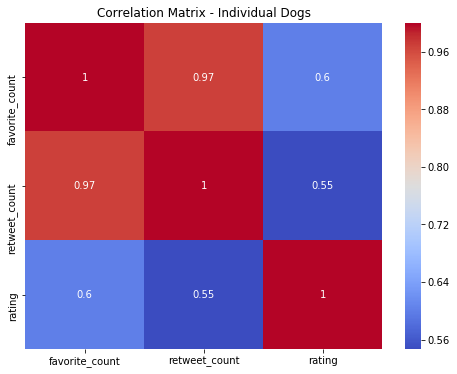

In [63]:
corr = tweet_merge_cln.drop('tweet_id',axis=1).corr(method='spearman')

plt.figure(figsize=(8,6))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix - Individual Dogs')

Text(0.5,1.05,'Pairplot of rating, favorite and retweet counts')

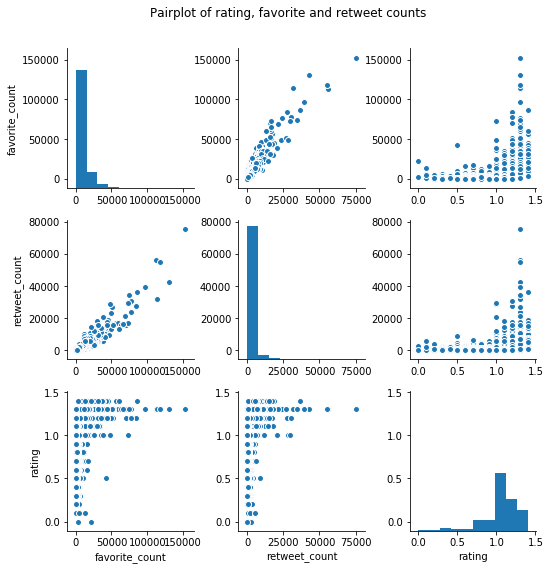

In [64]:
plt.figure(figsize=(12,8))
g = sns.pairplot(tweet_merge_cln.drop('tweet_id',axis=1))
g.fig.suptitle('Pairplot of rating, favorite and retweet counts',y=1.05)

#### Find out the rating distribution

Text(0,0.5,'Count of Rating')

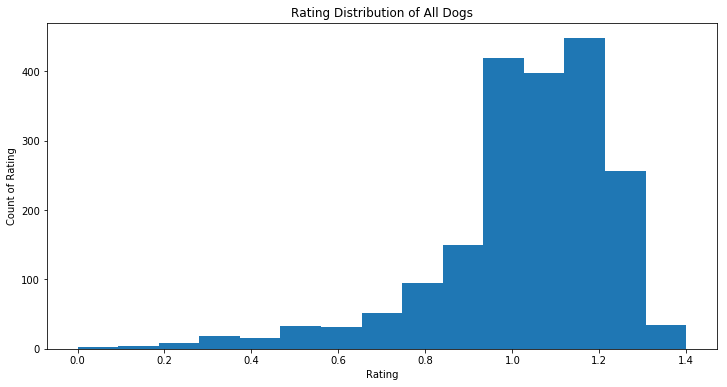

In [65]:
plt.figure(figsize=(12,6))
n = tweet_merge_cln.rating.nunique()

sns.distplot(tweet_merge_cln['rating'],kde=False,bins=n,hist_kws={'alpha':1.0})
plt.title('Rating Distribution of All Dogs')
plt.xlabel('Rating')
plt.ylabel('Count of Rating')

#### Find out the rating distribution for different dog stages

Text(0.5,1,'Rating Distribution for Different Dog Stages')

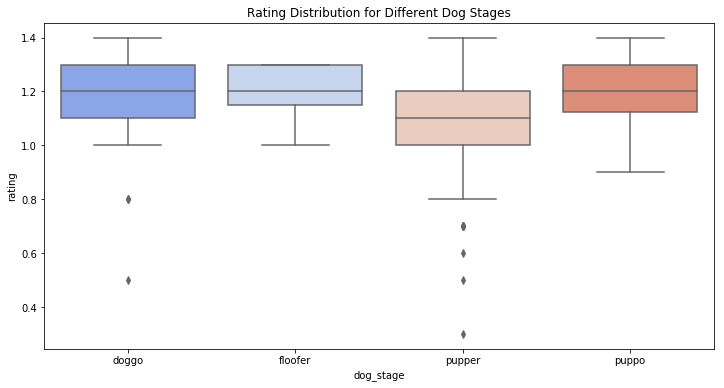

In [66]:
plt.figure(figsize=(12,6))
sns.boxplot(x='dog_stage',y='rating',data=tweet_merge_cln,palette='coolwarm')
plt.title('Rating Distribution for Different Dog Stages')

#### Find out the most rated and most liked dog breeds

In [67]:
df_breed = tweet_merge_cln.groupby('dog_breed')['rating','favorite_count','retweet_count'].agg({'rating':['count','mean'],'favorite_count':'mean','retweet_count':'mean'}).reset_index()
df_breed.columns = ['dog_breed','rating_count','rating_avg','favorite_avg','retweet_avg']
df_breed = df_breed.round({'rating_avg':4,'favorite_avg':0,'retweet_avg':0})
df_breed.head(1)

,dog_breed,rating_count,rating_avg,favorite_avg,retweet_avg
0,Afghan_hound,3,0.9667,15423.0,5067.0


Text(0.5,1.05,'Pairplot of breed_aggregated rating, favorite and retweet counts')

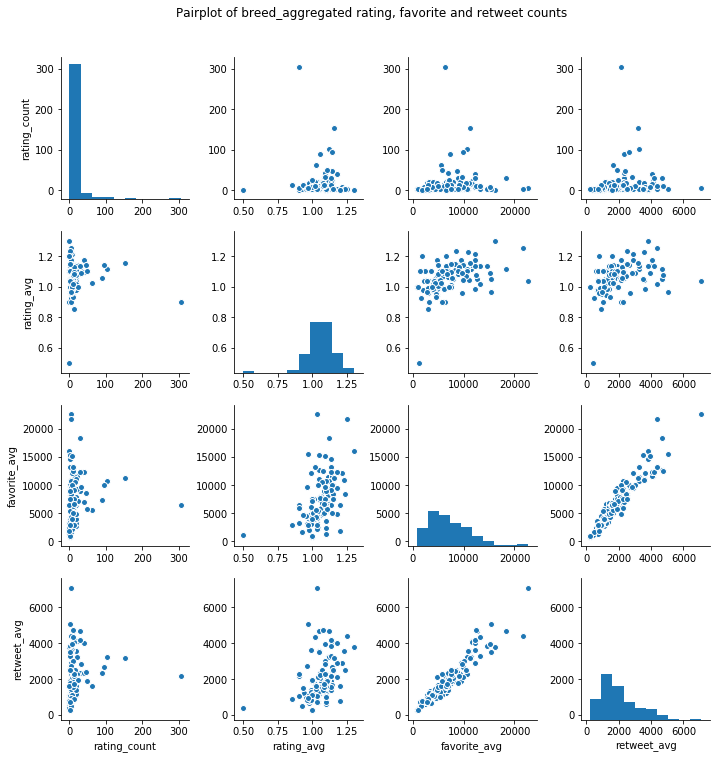

In [68]:
plt.figure(figsize=(12,8))
g = sns.pairplot(df_breed)
g.fig.suptitle('Pairplot of breed_aggregated rating, favorite and retweet counts',y=1.05)

Text(0.5,1,'Correlation Matrix - Dog Breeds')

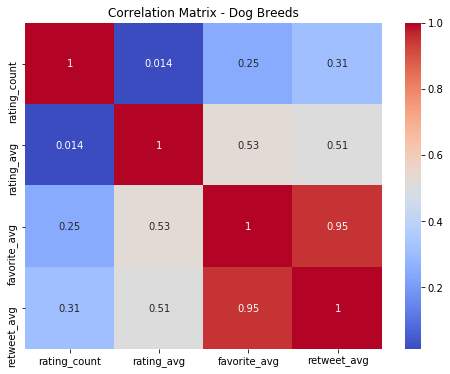

In [69]:
corr1 = df_breed.corr(method='spearman')

plt.figure(figsize=(8,6))
sns.heatmap(corr1,xticklabels=corr1.columns,yticklabels=corr1.columns,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix - Dog Breeds')

In [70]:
top_rated_breed = df_breed.sort_values(by='rating_count',ascending=False)[1:16]
top_rated_breed

,dog_breed,rating_count,rating_avg,favorite_avg,retweet_avg
90,golden_retriever,154,1.1552,11209.0,3191.0
37,Labrador_retriever,103,1.1165,10629.0,3243.0
50,Pembroke,95,1.1411,9988.0,2645.0
16,Chihuahua,90,1.0556,7419.0,2315.0
102,pug,62,1.0242,5513.0,1619.0
109,toy_poodle,50,1.1020,5799.0,1903.0
82,chow,47,1.1404,8634.0,2403.0
51,Pomeranian,42,1.0929,6902.0,2319.0
56,Samoyed,41,1.1732,12313.0,4032.0
96,malamute,33,1.0879,9687.0,2845.0


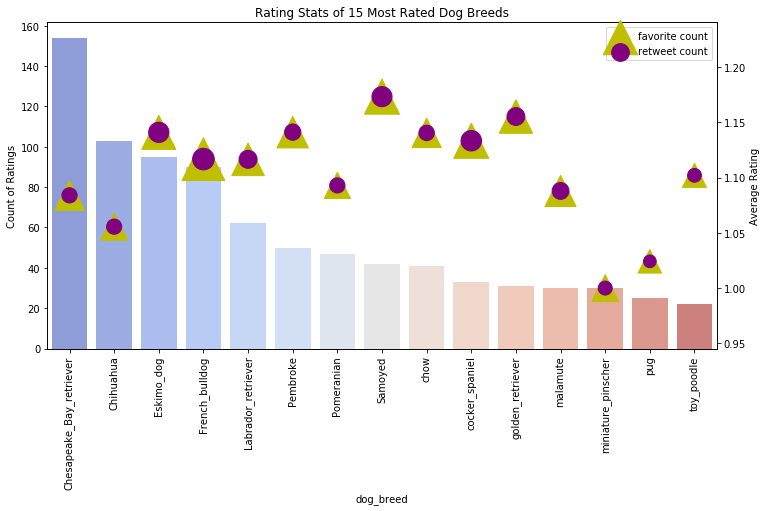

In [71]:
fig, ax1 = plt.subplots(figsize=(12,6))
ax2 = ax1.twinx()

for tick in ax1.get_xticklabels():
    tick.set_rotation(90)

sns.barplot(ax=ax1,y='rating_count',x='dog_breed',data=top_rated_breed,palette='coolwarm',alpha=0.7)
ax2.scatter(top_rated_breed['dog_breed'],top_rated_breed['rating_avg'],color='y',s=top_rated_breed['favorite_avg']/10,marker='^').set_label('favorite count')
ax2.scatter(top_rated_breed['dog_breed'],top_rated_breed['rating_avg'],color='purple',s=top_rated_breed['retweet_avg']/10,marker='o').set_label('retweet count')
plt.title('Rating Stats of 15 Most Rated Dog Breeds')
ax1.set_ylabel('Count of Ratings')
ax2.set_ylabel('Average Rating')
ax2.legend()

In [72]:
top_liked_breed = df_breed.sort_values(by='favorite_avg',ascending=False)[1:16]
top_liked_breed

,dog_breed,rating_count,rating_avg,favorite_avg,retweet_avg
55,Saluki,4,1.2500,21751.0,4382.0
23,French_bulldog,30,1.1167,18358.0,4675.0
11,Bouvier_des_Flandres,1,1.3000,16097.0,3802.0
0,Afghan_hound,3,0.9667,15423.0,5067.0
74,black-and-tan_coonhound,2,1.0500,15329.0,3522.0
88,flat-coated_retriever,8,1.0875,15162.0,3927.0
33,Irish_water_spaniel,3,1.1333,14641.0,3842.0
39,Leonberg,3,1.1333,13280.0,3283.0
112,whippet,11,1.0182,13206.0,4361.0
20,English_springer,10,1.0500,12710.0,4660.0


In [73]:
top_rated_breed = df_breed.sort_values(by='rating_avg',ascending=False)[1:16]
top_rated_breed

,dog_breed,rating_count,rating_avg,favorite_avg,retweet_avg
55,Saluki,4,1.2500,21751.0,4382.0
79,briard,3,1.2333,8475.0,2528.0
64,Tibetan_mastiff,4,1.2250,10820.0,3558.0
9,Border_terrier,7,1.2143,12204.0,2899.0
105,silky_terrier,1,1.2000,6516.0,1601.0
108,standard_schnauzer,1,1.2000,1792.0,769.0
26,Gordon_setter,4,1.1750,4880.0,2124.0
31,Irish_setter,4,1.1750,9425.0,2874.0
56,Samoyed,41,1.1732,12313.0,4032.0
90,golden_retriever,154,1.1552,11209.0,3191.0
